In [4]:
import numpy as np
import scipy.optimize

from matplotlib import pyplot as plt


In [ ]:
#Generate a linear model and find the best fit 

# Real data
np.random.seed(121)
theta = 1.2
n_samples = 30
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

# Plot the results
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');


#Parameter estimation

def MSE(theta, x, y):
    N = len(x)
    return 1/N*np.sum((theta*x - y)**2)

def optimize_likelihood(loss_func, theta_i, args):
#    bnds = ((None, None), (0, None))
    bnds = None
    ftol = 10e-6
    res = scipy.optimize.minimize(loss_func, theta_i, args=args, method = 'Nelder-Mead', bounds = bnds, tol = ftol)
    return res.fun, res.x



#Brute force
tt = np.linspace(0,1.5,100)
mse = [MSE(tt[i],x,y) for i in range(len(tt))]
brute_force_theta = tt[np.argmin(mse)]


#Unconstrained optimization 
args= (x,y)
fun , params = optimize_likelihood(MSE, 1, args)

# Bootstrap estimates
def resample_with_replacement(x, y):    
    indxs = np.random.choice(range(len(x)), len(x))    
    x_ = x[indxs]
    y_ = y[indxs]    
    return x_, y_

def bootstrap(x, y, n=2000):
    vals, params = np.zeros(n), np.zeros(n)
    for j in range(n):
        x_,y_ = resample_with_replacement(x, y)
        args= (x_,y_)
        vals[j] , params[j] = optimize_likelihood(MSE, 1, args)
    return vals, params
    

print(MSE(brute_force_theta,x,y), brute_force_theta)
print(fun,params)

In [ ]:
#Plots for bootstrap
    
fig, ax = plt.subplots()

# For each theta_hat, plot model
fun, theta_hats = bootstrap(x, y, n=2000)
for i, theta_hat in enumerate(theta_hats):
    y_hat = theta_hat * x
    ax.plot(x, y_hat, c='r', alpha=0.01, label='Resampled Fits' if i==0 else '')

# Plot observed data
ax.scatter(x, y, label='Observed')

# Plot true fit data
y_true = theta * x
ax.plot(x, y_true, 'g', linewidth=2, label='True Model')

ax.set(
  title='Bootstrapped Slope Estimation',
  xlabel='x',
  ylabel='y'
)

# Change legend line alpha property
handles, labels = ax.get_legend_handles_labels()
handles[0].set_alpha(1)

ax.legend()
plt.show()


fig, ax = plt.subplots()
ax.hist(theta_hats, bins=20, facecolor='C1', alpha=0.75)
ax.axvline(theta, c='g', label=r'True $\theta$')
ax.axvline(np.percentile(theta_hats, 50), color='r', label='Median')
ax.axvline(np.percentile(theta_hats, 2.5), color='b', label='95% CI')
ax.axvline(np.percentile(theta_hats, 97.5), color='b')
ax.legend()
ax.set(
    title='Bootstrapped Confidence Interval',
    xlabel=r'$\hat{{\theta}}$',
    ylabel='count',
    xlim=[1.0, 1.5]
)
plt.show()

In [ ]:
#Generate a multilinear model and find the best fit 
#TO DO : Make it into a class 


# Set random seed for reproducibility
np.random.seed(1234)

# Set parameters
theta_i = [0, -2, -3]
n_samples = 40

# Draw x and calculate y
n_regressors = len(theta_i)
x = np.random.uniform(-2, 2, (n_samples, n_regressors))
noise = np.random.randn(n_samples)
y = np.dot(x,theta_i) + noise

def MSE(theta_i, x, y):
    N = len(x)
    return 1/N*np.sum((x @ theta_i - y)**2)

def optimize_likelihood(loss_func, theta_i, args):
#    bnds = ((None, None), (0, None))
    bnds = None
    ftol = 10e-6
    res = scipy.optimize.minimize(loss_func, theta_i, args=args, method = 'Nelder-Mead', bounds = bnds, tol = ftol)
    return res.fun, res.x



#Unconstrained optimization 
args= (x,y)
params_0 = [1,1,1]
fun , params = optimize_likelihood(MSE, params_0, args)
print(params)

# Bootstrap estimates
def resample_with_replacement(x, y):    
    indxs = np.random.choice(range(len(x)), len(x))    
    x_ = x[indxs]
    y_ = y[indxs]    
    return x_, y_

def bootstrap(x, y, n=2000):
    vals, params = np.zeros(n), np.zeros((n,x.shape[1]))
    for j in range(n):
        x_,y_ = resample_with_replacement(x, y)
        args= (x_,y_)
        vals[j] , params[j] = optimize_likelihood(MSE, params_0, args)
    return vals, params


fun, theta_hats = bootstrap(x, y, n=2000)


In [ ]:
#Generate a polynomial model and find the best fit 
#TO DO: Make it into a class 


### Generate training data
np.random.seed(0)
n_train_samples = 50
x_train = np.random.uniform(-2, 2.5, n_train_samples) # sample from a uniform distribution over [-2, 2.5)
noise = np.random.randn(n_train_samples) # sample from a standard normal distribution
y_train =  x_train**2 - x_train - 2 + noise

### Generate testing data
n_test_samples = 20
x_test = np.random.uniform(-3, 3, n_test_samples) # sample from a uniform distribution over [-3, 3)
noise = np.random.randn(n_test_samples) # sample from a standard normal distribution
y_test =  x_test**2 - x_test - 2 + noise


x = np.zeros((n_samples,highest_rank+1))
x_b = np.random.uniform(-2, 2, (n_samples))
for k in range(highest_rank+1):
    x[:,k] = x_b**k
    
noise = np.random.randn(n_samples)
y = np.dot(x,theta_i) + noise

def MSE(theta_i, x, y):
    N = len(x)
    return 1/N*np.sum((x @ theta_i - y)**2)

def optimize_likelihood(loss_func, theta_i, args):
#    bnds = ((None, None), (0, None))
    bnds = None
    ftol = 10e-6
    res = scipy.optimize.minimize(loss_func, theta_i, args=args, method = 'Nelder-Mead', bounds = bnds, tol = ftol)
    return res.fun, res.x



#Unconstrained optimization 
args= (x,y_test)
params_0 = [1,1,1,1]
fun , params = optimize_likelihood(MSE, params_0, args)
print(params)

# Bootstrap estimates
def resample_with_replacement(x, y):    
    indxs = np.random.choice(range(len(x)), len(x))    
    x_ = x[indxs]
    y_ = y[indxs]    
    return x_, y_

def bootstrap(x, y, n=2000):
    vals, params = np.zeros(n), np.zeros((n,x.shape[1]))
    for j in range(n):
        x_,y_ = resample_with_replacement(x, y)
        args= (x_,y_)
        vals[j] , params[j] = optimize_likelihood(MSE, params_0, args)
    return vals, params


fun, theta_hats = bootstrap(x, y, n=2000)


In [ ]:
from sklearn.model_selection import KFold


In [20]:
# @title Data retrieval and loading

import os
import hashlib
import requests
import scipy.io as sio


fname = "RGCdata.mat"
url = "https://osf.io/mzujs/download"
expected_md5 = "1b2977453020bce5319f2608c94d38d0"
                
                
data = sio.loadmat(fname)  # loadmat is a function in scipy.io
dt_stim = data['dtStim'].item()  # .item extracts a scalar value

# Extract the stimulus intensity
stim = data['Stim'].squeeze()  # .squeeze removes dimensions with 1 element

# Extract the spike counts for one cell
cellnum = 2
spikes = data['SpCounts'][:, cellnum]

# Don't use all of the timepoints in the dataset, for speed
keep_timepoints = 20000
stim = stim[:keep_timepoints]
spikes = spikes[:keep_timepoints]


print(dt_stim)

0.008340605


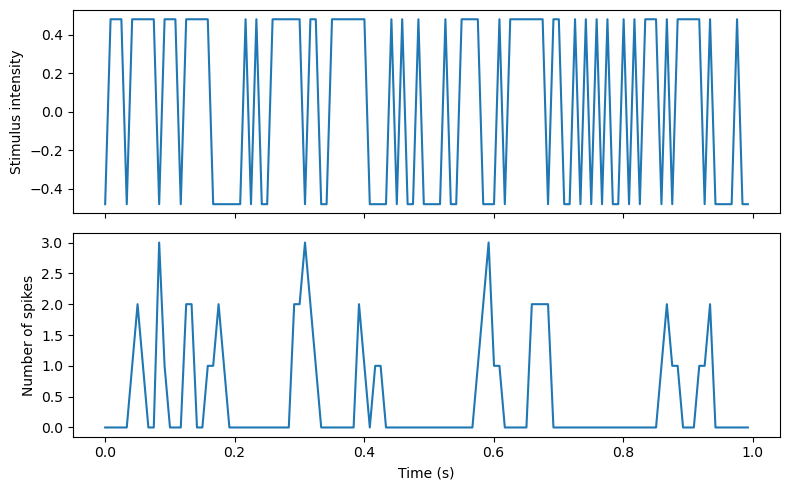

In [6]:
# @title Plotting Functions

def plot_stim_and_spikes(stim, spikes, dt, nt=120):
    """
    Show time series of stim intensity and spike counts.

    Args:
        stim (1D array): vector of stimulus intensities
        spikes (1D array): vector of spike counts
        dt (number): duration of each time step
        nt (number): number of time steps to plot

  """
    timepoints = np.arange(nt)
    time = timepoints * dt

    f, (ax_stim, ax_spikes) = plt.subplots(
    nrows=2, sharex=True, figsize=(8, 5),
    )
    ax_stim.plot(time, stim[timepoints])
    ax_stim.set_ylabel('Stimulus intensity')

    ax_spikes.plot(time, spikes[timepoints])
    ax_spikes.set_xlabel('Time (s)')
    ax_spikes.set_ylabel('Number of spikes')

    f.tight_layout()
    plt.show()


def plot_glm_matrices(X, y, nt=50):
    """
    Show X and Y as heatmaps.

    Args:
    X (2D array): Design matrix.
    y (1D or 2D array): Target vector.

    """
    from matplotlib.colors import BoundaryNorm
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    Y = np.c_[y]  # Ensure Y is 2D and skinny

    f, (ax_x, ax_y) = plt.subplots(
    ncols=2,
    figsize=(6, 8),
    sharey=True,
    gridspec_kw=dict(width_ratios=(5, 1)),
    )
    norm = BoundaryNorm([-1, -.2, .2, 1], 256)
    imx = ax_x.pcolormesh(X[:nt], cmap="coolwarm", norm=norm)

    ax_x.set(
    title="X\n(lagged stimulus)",
    xlabel="Time lag (time bins)",
    xticks=[4, 14, 24],
    xticklabels=['-20', '-10', '0'],
    ylabel="Time point (time bins)",
    )
    plt.setp(ax_x.spines.values(), visible=True)

    divx = make_axes_locatable(ax_x)
    caxx = divx.append_axes("right", size="5%", pad=0.1)
    cbarx = f.colorbar(imx, cax=caxx)
    cbarx.set_ticks([-.6, 0, .6])
    cbarx.set_ticklabels(np.sort(np.unique(X)))

    norm = BoundaryNorm(np.arange(y.max() + 1), 256)
    imy = ax_y.pcolormesh(Y[:nt], cmap="magma", norm=norm)
    ax_y.set(
    title="Y\n(spike count)",
    xticks=[]
    )
    ax_y.invert_yaxis()
    plt.setp(ax_y.spines.values(), visible=True)

    divy = make_axes_locatable(ax_y)
    caxy = divy.append_axes("right", size="30%", pad=0.1)
    cbary = f.colorbar(imy, cax=caxy)
    cbary.set_ticks(np.arange(y.max()) + .5)
    cbary.set_ticklabels(np.arange(y.max()))
    plt.show()


def plot_spike_filter(theta, dt, show=True, **kws):
    """Plot estimated weights based on time lag model.

    Args:
    theta (1D array): Filter weights, not including DC term.
    dt (number): Duration of each time bin.
    kws: Pass additional keyword arguments to plot()
    show (boolean): To plt.show or not the plot.
    """
    d = len(theta)
    t = np.arange(-d + 1, 1) * dt

    ax = plt.gca()
    ax.plot(t, theta, marker="o", **kws)
    ax.axhline(0, color=".2", linestyle="--", zorder=1)
    ax.set(
    xlabel="Time before spike (s)",
    ylabel="Filter weight",
    )
    if show:
        plt.show()


def plot_spikes_with_prediction(spikes, predicted_spikes, dt, nt=50, t0=120, **kws):
    """Plot actual and predicted spike counts.

    Args:
    spikes (1D array): Vector of actual spike counts
    predicted_spikes (1D array): Vector of predicted spike counts
    dt (number): Duration of each time bin.
    nt (number): Number of time bins to plot
    t0 (number): Index of first time bin to plot.
    show (boolean): To plt.show or not the plot.
    kws: Pass additional keyword arguments to plot()

    """
    t = np.arange(t0, t0 + nt) * dt

    f, ax = plt.subplots()
    lines = ax.stem(t, spikes[:nt])
    plt.setp(lines, color=".5")
    lines[-1].set_zorder(1)
    kws.setdefault("linewidth", 3)
    yhat, = ax.plot(t, predicted_spikes[:nt], **kws)
    ax.set(
      xlabel="Time (s)",
      ylabel="Spikes",
    )
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.legend([lines[0], yhat], ["Spikes", "Predicted"])
    plt.show()
    
    
    
plot_stim_and_spikes(stim, spikes, dt_stim)


In [29]:
#Here we create the design matrix

d = 25

X = np.zeros((len(stim), d))




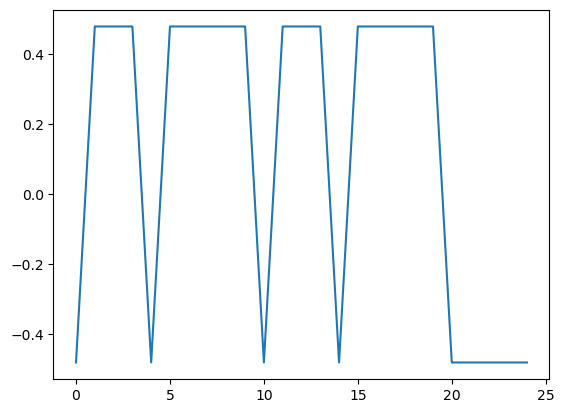

In [31]:
plt.plot(stim[0:d])

In [32]:
stim[0:d][0]

-0.48